# Round 2. Implementing the Watts-Strogatz small-world model

In this exercise, you will implement the Watts-Strogatz small-world model [1], which is a very simple network model that yields small diameter as well as high level of clustering. In practice, the Watts-Strogatz model is a ring lattice where some of the links have been randomly rewired. 
The model has three parameters: network size N , m (each node on the ring connects to m nearest neighbors both to the left and to the right), and p, the probability of rewiring one end of each link to a random endpoint node.

To get you started, you may use this notebook. You only need to fill in the required functions. Some of the functions do NOT need modifications, but do not worry, they are clearly marked. You may start your solution after the subtitle "**Begin of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Begin of the Exercise
Write your code here to implement the Watts-Strogatz small-world model

### a. Watts-Strogatz small world model
Implement the Watts-Strogatz small world model and visualize the network using $N=30$, $m=2$, $p=0.2$, and $N=80$, $m=2$, $p=0.4$ using a circular layout algorithm `nx.draw_circular(G)`, and check that the networks look right. For each network, report the total number of links and also the number of rewired links.


**Note**: NetworkX has a ready-made function for small-world networks but here the task is to program your own function, so do not use it (except for checking results, if in doubt).

**Note**: Notice that each node should have 4 neighbors: 2 to the right and 2 to the left ($m=2$). 

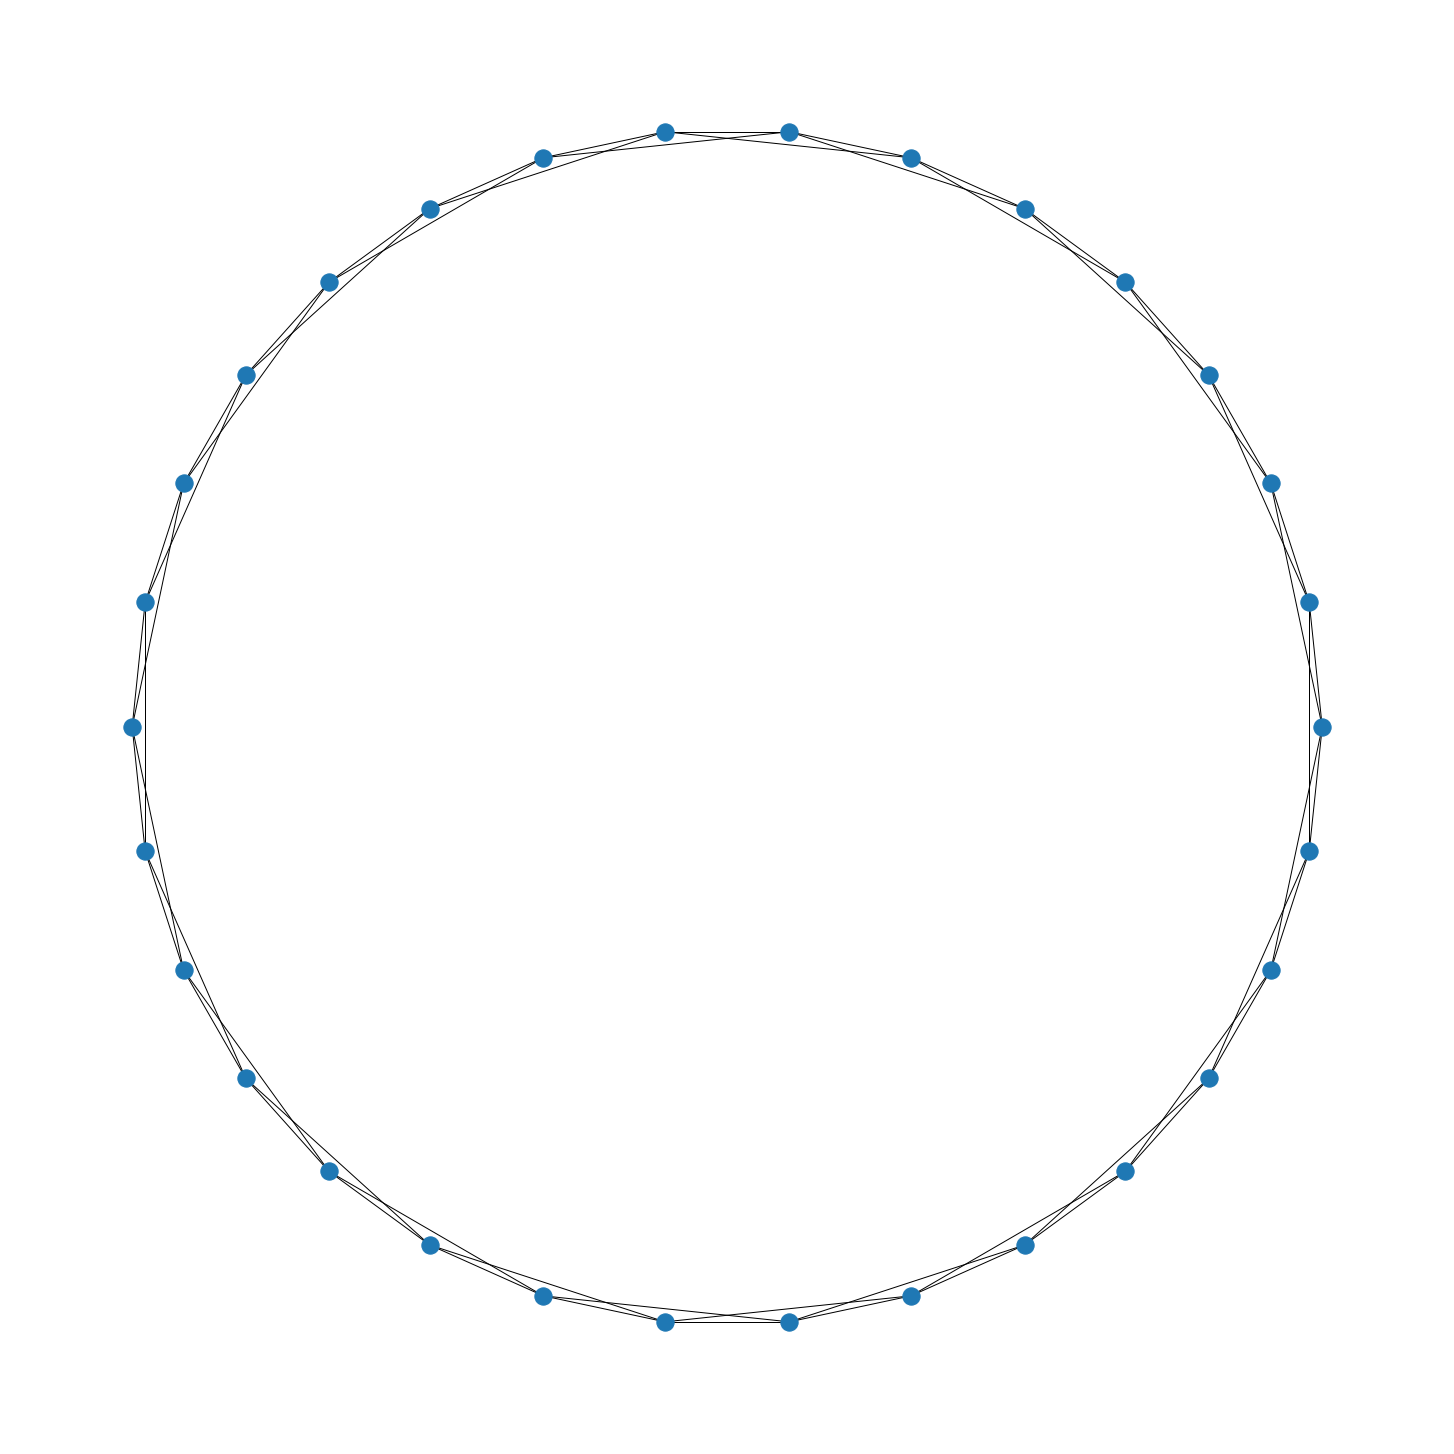

In [11]:
def ring(n, m):
    """
    This function creates the basic ring (to be rewired) with n nodes
    in which each node is connected to m nodes on the left and right.

    Parameters
    ----------
    n : int
      Number of nodes
    m : int
      Number of neighbors to connect left and right

    Returns
    -------
    network : graph
             The basic ring before rewiring
    """
    network = nx.Graph()
    
    # Node list
    nodes = [node for node in range(n)]
    
    # Add nodes
    for node in nodes:
        network.add_node(node)
    
    # Add edges
    for i in nodes:
        network.add_edge(nodes[i], nodes[i-1])
        network.add_edge(nodes[i], nodes[i-2])
        
    return network
G = ring(30, 2)
fig = plt.figure(1, figsize=(20, 20))
nx.draw_circular(G)

total number of links:
60
number of rewired links:
17


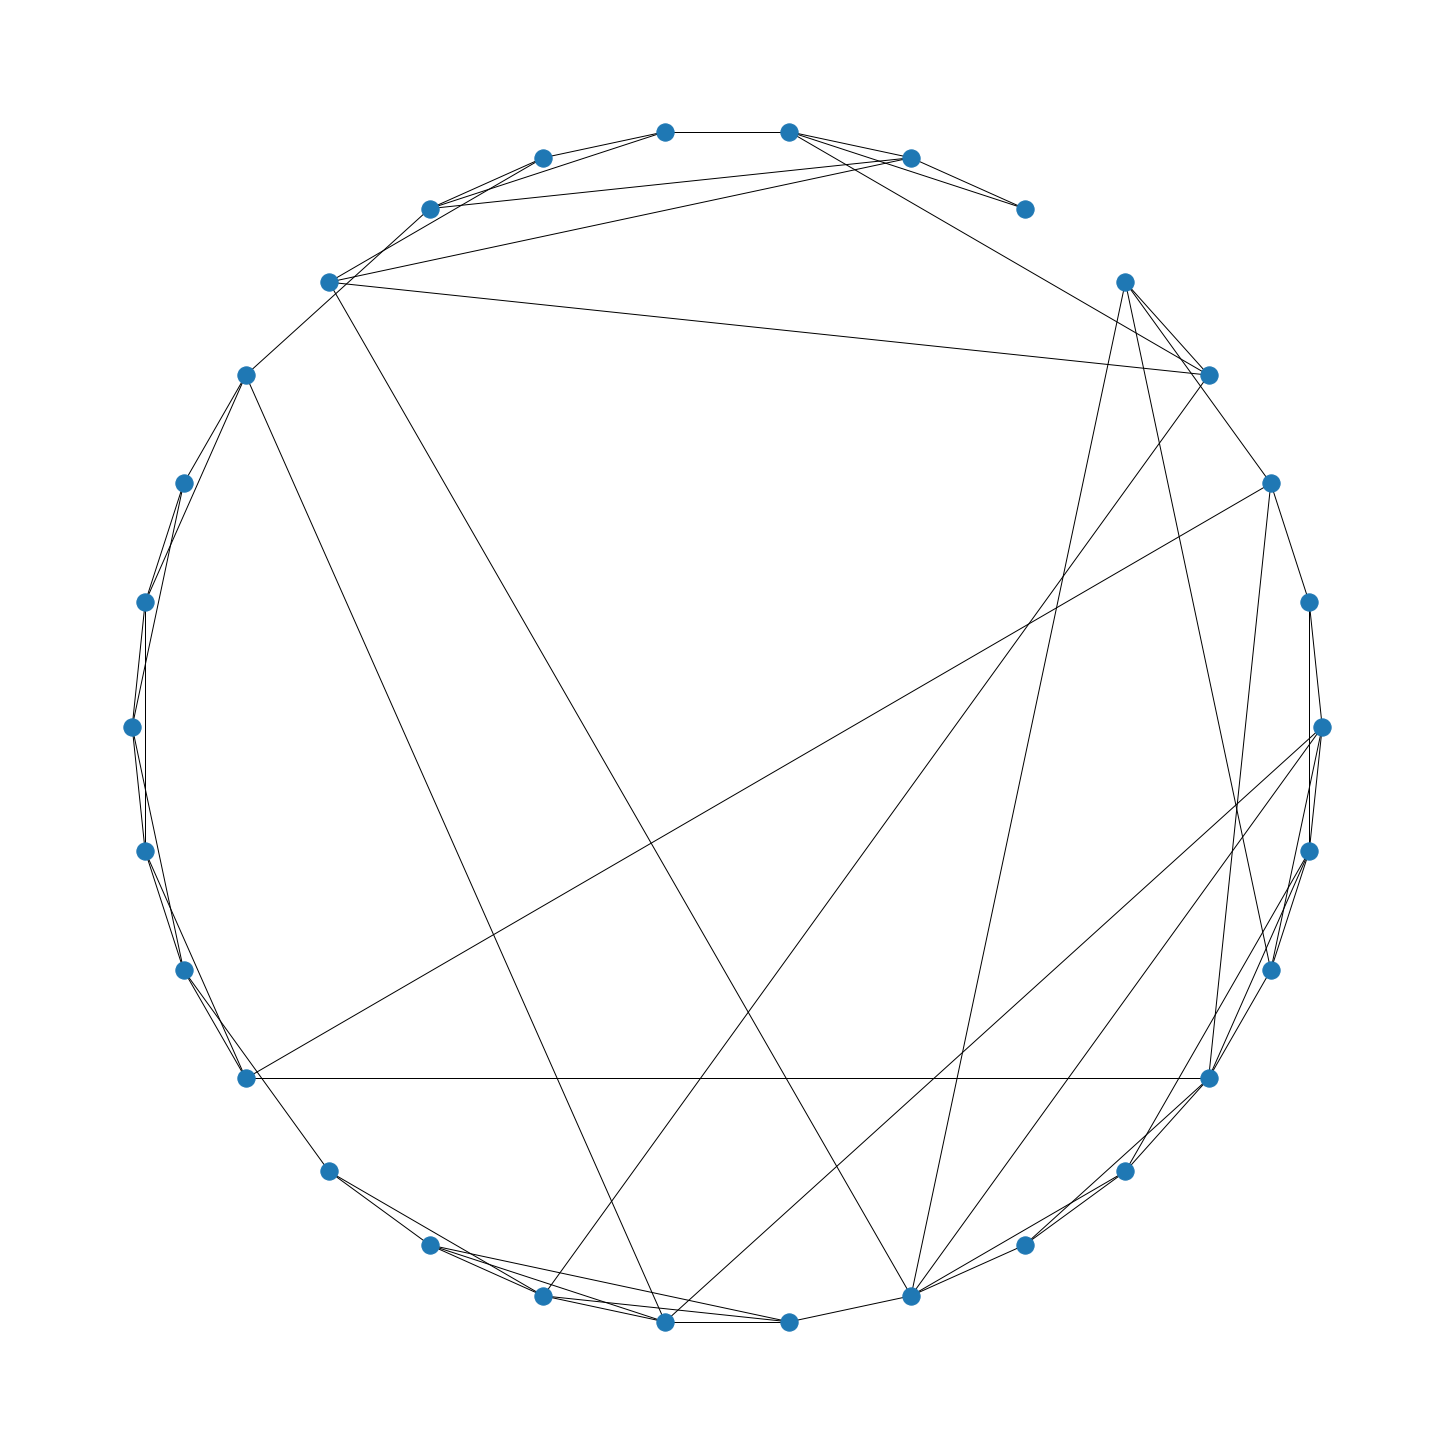

In [12]:
def ws(n, m, p):
    """
    This function call the ring() function to make a basic ring and then
    rewires each link with  probability p and also prints the total number of
    links and the number of rewired links.
    Note self-loops are not allowed when rewiring (check that you do not rewire
    the end of a link to the node at its other end!)

    Parameters
    ----------
    n : int
      Number of nodes
    m : int
      Number of neighbors to connect left and right
    p : float
        Rewiring probability

    Returns
    -------
    network : graph
        The Watts-Strogatz small-world network

    """
    network = ring(n, m)
    edges = network.edges()
    rewired_num = 0 # tracks the number of rewired links
    total_num = 0 # tracks the total number of links in the network
    # You should rewire each edge if: numpy.random.rand() < p
    # Also, avoid duplicate links (rewiring to a neighbor of the other node)
    # as well as self-links (rewiring one endpoint to the other)
    # You might find these useful: random.choice and nx.non_neighbors
    # The latter yields an iterator: NN=nx.non_neighbors(G,i) lists all nodes
    # that are not connected to i (and are not i)
    # YOUR CODE HERE
    
    for edge in edges:
        if np.random.rand() > p:
            continue

        edge_s, edge_e = edge
        edges_ls = nx.non_neighbors(network, edge_s) # lists all nodes that are not connected to i (and are not i)
        edges_ls = list(edges_ls)
        edge_e_new = random.choice(edges_ls)

        if network.has_edge(edge_e_new, edge_s):
            # This should never happen, if the non_neighbors function works correctly
            print("Edge already existing (multiple edges are not allowed)")
            continue

        network.remove_edge(edge_s, edge_e)
        network.add_edge(edge_s, edge_e_new)
        rewired_num += 1

    total_num = len(network.edges())
        
    #print total number of links in the graph and number of rewired links:
    print("total number of links:")
    print(total_num)
    print("number of rewired links:")
    print(rewired_num)
    return network
G = ws(30, 2, .2)
fig = plt.figure(1, figsize=(20, 20))
nx.draw_circular(G)

In [13]:
ws(30, 2, .2)

total number of links:
60
number of rewired links:
11


total number of links:
60
number of rewired links:
9
Total number of edges for n = 30, m = 2, p = 0.2 :
60
total number of links:
160
number of rewired links:
65
Total number of edges for n = 80, m = 2, p = 0.4 :
160


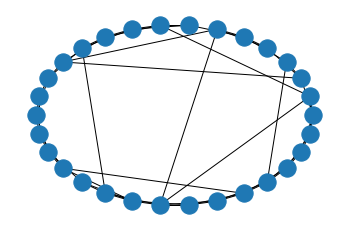

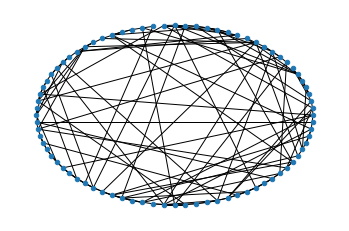

In [14]:
np.random.seed(96)
#visualizing the rings for p = 0 ...
graph1 = ws(30, 2, .2)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
nx.draw_circular(graph1)

figure_filename = './WS_1.pdf'

fig1.savefig(figure_filename)
# or just use plt.show() and save manually

total_num_edges = len(list(graph1.edges()))
print("Total number of edges for n = 30, m = 2, p = 0.2 :")
print(total_num_edges)
#... and p = 0.3
graph2 = ws(80, 2, 0.4)
fig2 = plt.figure()
ax = fig2.add_subplot(111)
nx.draw_circular(graph2, node_size=20)

figure_filename = './WS_2.pdf'

fig2.savefig(figure_filename)
# or just use plt.show() and save manually

total_num_edges = len(list(graph2.edges()))
print("Total number of edges for n = 80, m = 2, p = 0.4 :")
print(total_num_edges)

### b. Relative average clustering coefficient
Plot the relative average clustering coefficient $c(p)/c(p=0)$ and average shortest path length $l(p)/l(p=0)$ vs. $p$ in your network, for $p = 0.001, . . . , 1.0$ (see the notebook for the log-spaced values). Here, relative=average value for given p divided by the same value for $p=0$. Use $N=1000$ and $m=4$. Use a logarithmic x-axis in your plot (ax.semilogx). After, answer the following questions:

- Are your results are in line with the plots in the lecture slides?
- Why does the relative clustering coefficient decreases as the probability increases?
- What happens to the relative path length? Why?

In [15]:
# Produce the basic ring network and calculate the average clustering
# coefficient and average shortest path of the network
basic_ring = ring(1000, 4)

c_basic = nx.average_clustering(basic_ring)
l_basic = nx.average_shortest_path_length(basic_ring)
print("Average clustering coefficient basic network:", c_basic)
print("Average shortest path basic network", l_basic)

probability = [0.001*(2**n) for n in range(11)] #[0.001, 0.002, 0.004, ...]
relative_c = []
relative_l = []

for p in probability:
    smallworld = ws(1000, 4, p)

    # gets all connected components; mostly there is just one:
    components = (smallworld.subgraph(c) for c in nx.connected_components(smallworld))

    # finds the largest to be used for the average path length:
    largest_component = max(components, key=len)

    c_rewired = nx.average_clustering(largest_component)
    l_rewired = nx.average_shortest_path_length(largest_component)
    # Update relative_c and relative_l
    relative_c.append(c_rewired/c_basic)
    relative_l.append(l_rewired/l_basic)

Average clustering coefficient basic network: 0.5
Average shortest path basic network 125.37537537537537
total number of links:
2000
number of rewired links:
1
total number of links:
2000
number of rewired links:
9
total number of links:
2000
number of rewired links:
5
total number of links:
2000
number of rewired links:
10
total number of links:
2000
number of rewired links:
40
total number of links:
2000
number of rewired links:
66
total number of links:
2000
number of rewired links:
125
total number of links:
2000
number of rewired links:
264
total number of links:
2000
number of rewired links:
556
total number of links:
2000
number of rewired links:
1069
total number of links:
2000
number of rewired links:
2000


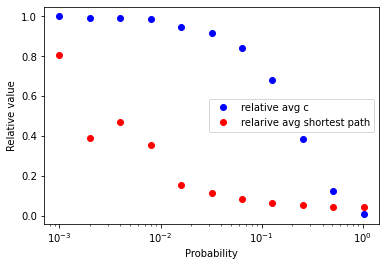

In [26]:
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.semilogx(probability, relative_c, marker='o', ls='', color='b', label='relative avg c')
ax.semilogx(probability, relative_l, marker='o', ls='', color='r', label='relarive avg shortest path')

# Label the axes
# YOUR CODE HERE
# raise NotImplementedError()
plt.xlabel("Probability")
plt.ylabel("Relative value")
plt.legend()

figure_filename = 'WS_relative_c_and_l.pdf'

fig3.savefig(figure_filename)